In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [71]:
csv_path = "/Users/tequan/Desktop/Cours ISEN/Projet M1/jena_climate_2009_2016.csv"

df1 = pd.read_csv(csv_path)
df1.head(15)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [72]:
df = df1.iloc[:, [0, 2, 5]]
df = df.rename(columns={df.columns[1]: 'temperature', df.columns[2]: 'humidity'})
df.head(10)

,Date Time,temperature,humidity
0,01.01.2009 00:10:00,-8.02,93.3
1,01.01.2009 00:20:00,-8.41,93.4
2,01.01.2009 00:30:00,-8.51,93.9
3,01.01.2009 00:40:00,-8.31,94.2
4,01.01.2009 00:50:00,-8.27,94.1
5,01.01.2009 01:00:00,-8.05,94.4
6,01.01.2009 01:10:00,-7.62,94.8
7,01.01.2009 01:20:00,-7.62,94.4
8,01.01.2009 01:30:00,-7.91,93.8
9,01.01.2009 01:40:00,-8.43,93.1


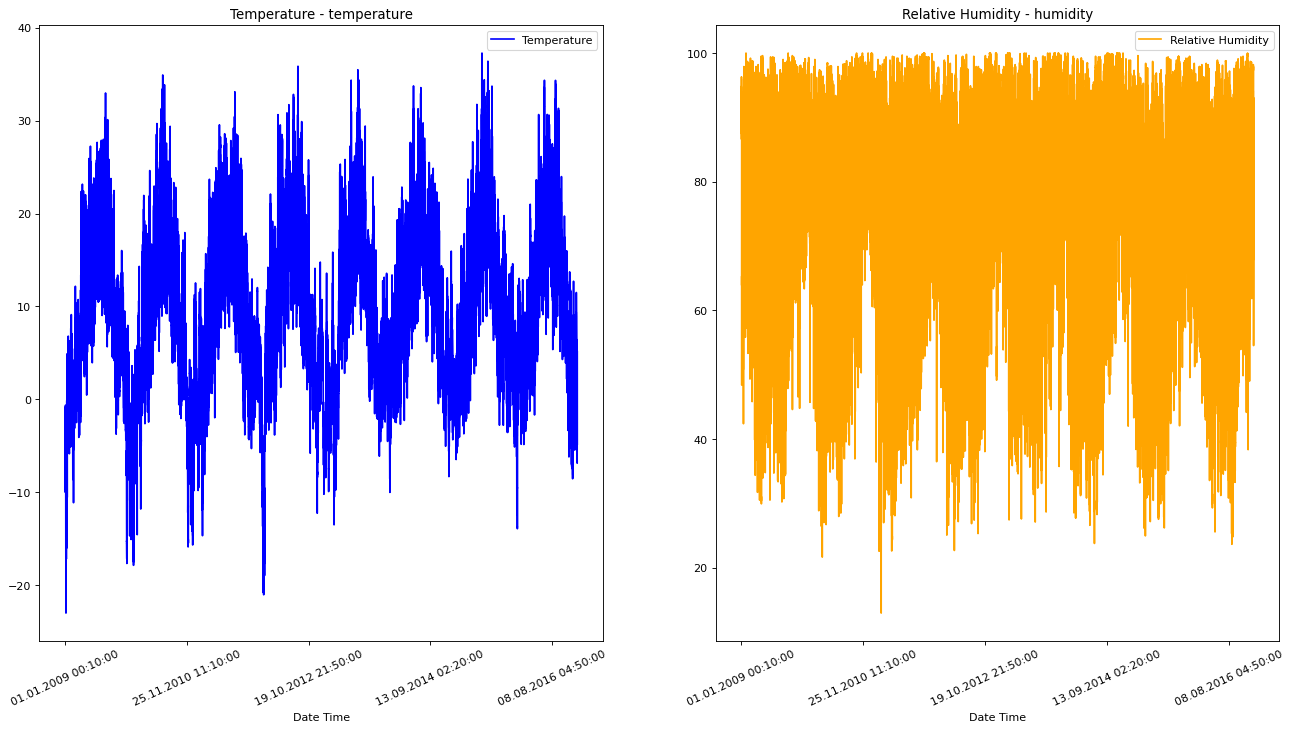

In [73]:
titles = [
   
    "Temperature",
    "Relative Humidity"
]

feature_keys = [
    "temperature",
    "humidity"
    
]

colors = [
    "blue",
    "orange"
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=1, ncols=2, figsize=(20, 10), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])


show_raw_visualization(df)

In [245]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [179]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1]]),
)
selected_features = [feature_keys[i] for i in [0,1]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()
print(features)
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]


The selected parameters are: Temperature, Relative Humidity
                     temperature  humidity
Date Time                                 
01.01.2009 00:10:00        -8.02     93.30
01.01.2009 00:20:00        -8.41     93.40
01.01.2009 00:30:00        -8.51     93.90
01.01.2009 00:40:00        -8.31     94.20
01.01.2009 00:50:00        -8.27     94.10
...                          ...       ...
31.12.2016 23:20:00        -4.05     73.10
31.12.2016 23:30:00        -3.35     69.71
31.12.2016 23:40:00        -3.16     67.91
31.12.2016 23:50:00        -4.23     71.80
01.01.2017 00:00:00        -4.82     75.70

[420551 rows x 2 columns]


In [252]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(2)]].values
y_train = features.iloc[start:end, [0]]

sequence_length = int(past / step)


In [253]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [254]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(2)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 2)
Target shape: (256, 1)


In [255]:
'''inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# First LSTM layer
x = keras.layers.LSTM(32)(inputs)
# Second LSTM layer
#x = keras.layers.LSTM(128)(x)
#x = keras.layers.BatchNormalization()(x)
#x = keras.layers.Dropout(0.2)(x)

# Fully connected layer for temperature output
temp_output = keras.layers.Dense(1, name='temp_output')(x)

# Fully connected layer for humidity output
humid_output = keras.layers.Dense(1, name='humid_output')(x)

# Define model
model = keras.models.Model(inputs=inputs, outputs=[temp_output, humid_output])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()'''

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 120, 2)]          0         
                                                                 
 lstm_10 (LSTM)              (None, 32)                4480      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [256]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10


2023-04-19 00:05:14.997681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-19 00:05:15.299767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-19 00:05:16.040593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1172/1172 [==============================] - ETA: 0s - loss: 0.1085

2023-04-19 00:06:04.766459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-19 00:06:04.858255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.03383, saving model to model_checkpoint.h5
1172/1172 [==============================] - 66s 50ms/step - loss: 0.1085 - val_loss: 0.0338
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.0221
Epoch 2: val_loss improved from 0.03383 to 0.01744, saving model to model_checkpoint.h5
1172/1172 [==============================] - 55s 47ms/step - loss: 0.0221 - val_loss: 0.0174
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.0128
Epoch 3: val_loss improved from 0.01744 to 0.01280, saving model to model_checkpoint.h5
1172/1172 [==============================] - 54s 46ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.0105
Epoch 4: val_loss improved from 0.01280 to 0.01131, saving model to model_checkpoint.h5
1172/1172 [==============================] - 54s 46ms/step - loss: 0.0105 - val_loss: 0.0113
Epoch 5/10
1172/1172 [====================

In [260]:
tf.saved_model.save(model, 'model_temp')


INFO:tensorflow:Assets written to: model_temp/assets


INFO:tensorflow:Assets written to: model_temp/assets


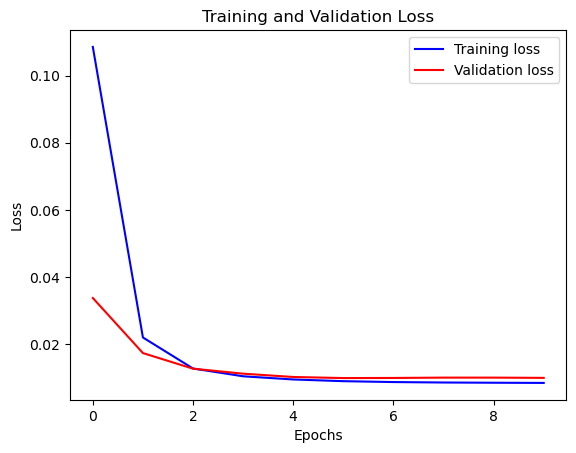

In [257]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [ ]:
'''# Plot the loss for the first output
plt.plot(history.history['temp_output_loss'], label='train_loss')
plt.plot(history.history['val_temp_output_loss'], label='val_loss')
plt.title('Loss Temperature')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the loss for the second output
plt.plot(history.history['humid_output_loss'], label='train_loss')
plt.plot(history.history['val_humid_output_loss'], label='val_loss')
plt.title('Loss Humidity')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()'''

In [258]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


In [ ]:
'''for x, y in dataset_val.take(5):
    # Extract temperature and humidity inputs from x
    hum_input = x[0][:,0].numpy()
    temp_input = x[0][:,1].numpy()

    # Extract single output value from y
    hum_output = y[0][0].numpy()
    temp_output = y[0][1].numpy()

    # Predict outputs using the model
    hum_pred, temp_pred = model.predict(x)


    # Call show_plot function with temperature and humidity input and output arrays
    show_plot(
        [temp_input, hum_input, temp_output, hum_output, temp_pred, hum_pred],
        16,
        "Single Step Prediction",
    )'''

8/8 [==============================] - 1s 40ms/step


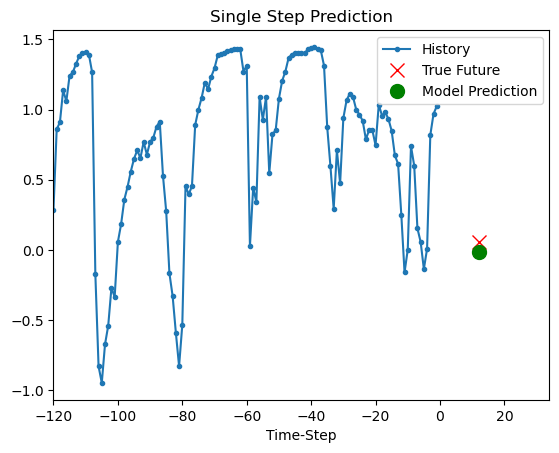

8/8 [==============================] - 0s 30ms/step
[-0.0137828]
8/8 [==============================] - 0s 28ms/step


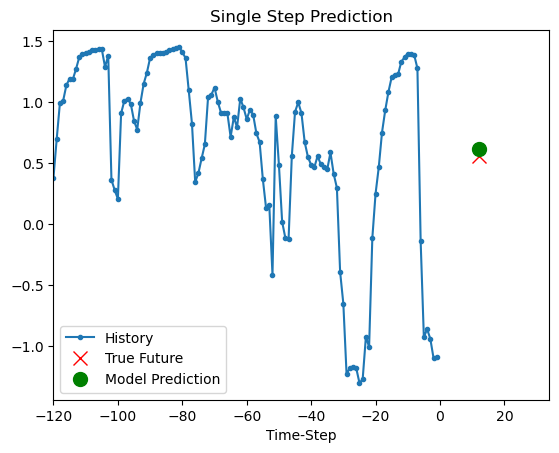

8/8 [==============================] - 0s 50ms/step
[0.6143475]
8/8 [==============================] - 0s 34ms/step


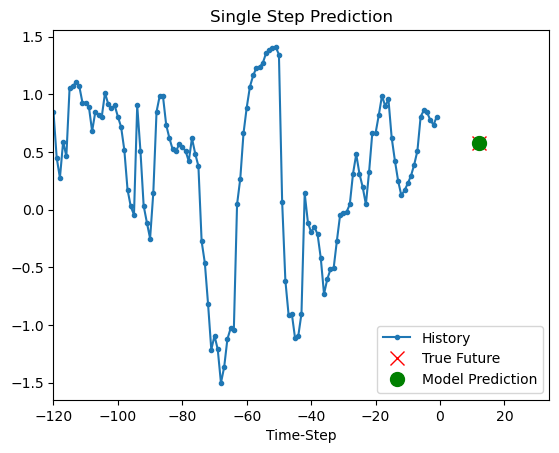

8/8 [==============================] - 0s 33ms/step
[0.57512945]
8/8 [==============================] - 0s 31ms/step


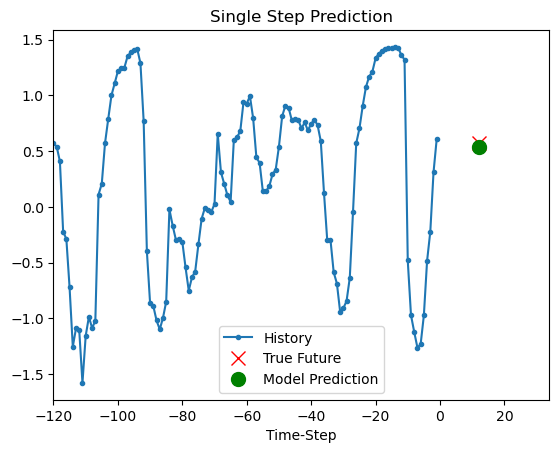

8/8 [==============================] - 0s 37ms/step
[0.5415229]
8/8 [==============================] - 0s 30ms/step


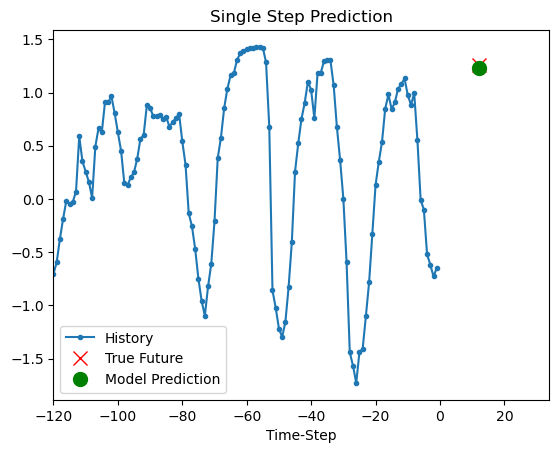

8/8 [==============================] - 0s 34ms/step
[1.2270743]


In [261]:
for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )
    print(model.predict(x)[0])
   